In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [326]:
df=pd.read_csv('used_cars_data.csv')

In [327]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [328]:
# Description

df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [329]:
# Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [330]:
# Checking Null Values

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [331]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [332]:
# Filling Null Values

# Filling Null Values in Milage
df.Mileage.fillna(df.Mileage.mode().sum(),inplace=True)

In [333]:
# Filling Null Values in Engine

df.Engine.fillna(df.Engine.mode().sum(),inplace=True)

In [334]:
# Filling Null values in Power

df.Power.fillna(df.Power.mode().sum(),inplace=True)

In [335]:
df.Seats.value_counts()

Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: count, dtype: int64

In [336]:
# Filling Null values in seats

df.Seats.fillna(df.Seats.mode().sum(),inplace=True)
df.Seats=np.where(df.Seats==0.0,df.Seats.mode().sum(),df.Seats)

In [337]:
# Rechecking null values

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
dtype: int64

In [338]:
# Converting 'Mileage' object into float
milage=[]
for i in df.Mileage:
    if ' km/kg' in i:
        mil=i.split(' km/kg')[0]
        milage.append(float(mil))
    elif ' kmpl' in i:
        mil=i.split(' kmpl')[0]
        milage.append(float(mil))
    else:
        milage.append(0)

In [339]:
# Replacing Milage with float
df.Mileage=milage

In [340]:
df[df.Mileage==0].head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,NaN,17.50
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,49.14 Lakh,35.67
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,NaN,1.30
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1197 CC,74 bhp,5.0,NaN,2.95
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,5.0,NaN,3.60


In [341]:
# Replacing '0.0' in milage with mean

df.Mileage=np.where(df.Mileage==0.0,df.Mileage.mean(),df.Mileage)

In [342]:
df[df.Mileage==0].head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [343]:
# Converting 'Engine' object into float

engine=[]
for i in df.Engine:
    if ' CC' in i:
        mil=i.split(' CC')[0]
        engine.append(float(mil))
    else:
        engine.append(0)

In [344]:
df.Engine=engine

In [345]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74


In [346]:
# Converting 'Power' object into float

power=[]
for i in df.Power:
    if ' bhp' in i:
        mil=i.split(' bhp')
        if mil[0]=='null':
            power.append(0)
        elif ' bhp' in i:
            nil=i.split(' bhp')[0]
            power.append(float(nil))
    else:
        power.append(0)

In [347]:
df.Power=power

In [348]:
df[df.Power==0].head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.800000,1399.0,0.0,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,18.141266,1086.0,0.0,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.000000,1086.0,0.0,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.000000,1086.0,0.0,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.000000,1086.0,0.0,5.0,NaN,1.67


In [349]:
df.Power=np.where(df.Power==0,df.Power.mean(),df.Power)

In [350]:
df[df.Power==0].head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [351]:
# predictions

new_df=df
from sklearn.preprocessing import OrdinalEncoder

In [352]:
oe=OrdinalEncoder()

In [353]:
new_df[['Location','Year','Fuel_Type','Transmission','Owner_Type']]=oe.fit_transform(new_df[['Location','Year','Fuel_Type','Transmission','Owner_Type']])

In [354]:
new_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,9.0,13.0,72000,0.0,1.0,0.0,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,10.0,18.0,41000,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,2.0,14.0,46000,4.0,1.0,0.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,2.0,15.0,87000,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,3.0,16.0,40670,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,5.0,14.0,89411,1.0,1.0,0.0,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,9.0,18.0,59000,4.0,0.0,0.0,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,8.0,15.0,28000,1.0,1.0,0.0,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,10.0,16.0,52262,4.0,0.0,3.0,17.20,1197.0,103.60,5.0,NaN,NaN


In [355]:
# Extracing the data not having null values in price
pr_df=df[df.Price.isnull()==False]
pr_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,9.0,13.0,72000,0.0,1.0,0.0,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,10.0,18.0,41000,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,2.0,14.0,46000,4.0,1.0,0.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,2.0,15.0,87000,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,3.0,16.0,40670,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,NaN,17.74


In [356]:
x=pr_df.iloc[0::,2:12]

In [357]:
y=pr_df.Price

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [360]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
rfr=RandomForestRegressor()

In [362]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [363]:
y_pred=rfr.predict(x_test)

In [364]:
from sklearn.metrics import r2_score

In [365]:
r2_score(y_test,y_pred).round(2)

0.88

In [366]:
# x_test in which price is null
null_price_df=new_df[new_df.Price.isnull()==True]
null_price_df.reset_index(drop=True,inplace=True)

In [367]:
# Predicting Price having Null values
x_test_null_price=null_price_df.iloc[0::,2:12]

In [368]:
x_test_null_price

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,4.0,17.0,40929,0.0,1.0,0.0,32.26,998.0,58.200000,4.0
1,3.0,16.0,54493,4.0,1.0,2.0,24.70,796.0,47.300000,5.0
2,9.0,20.0,34000,1.0,1.0,0.0,13.68,2393.0,147.800000,7.0
3,5.0,15.0,139000,1.0,1.0,0.0,23.59,1364.0,110.513744,5.0
4,9.0,17.0,29000,4.0,1.0,0.0,18.50,1197.0,82.850000,5.0
...,...,...,...,...,...,...,...,...,...,...
1229,5.0,14.0,89411,1.0,1.0,0.0,20.54,1598.0,103.600000,5.0
1230,9.0,18.0,59000,4.0,0.0,0.0,17.21,1197.0,103.600000,5.0
1231,8.0,15.0,28000,1.0,1.0,0.0,23.08,1461.0,63.100000,5.0
1232,10.0,16.0,52262,4.0,0.0,3.0,17.20,1197.0,103.600000,5.0


In [369]:
null_price_pred=rfr.predict(x_test_null_price)

In [370]:
# prediction Results
null_price_pred

array([ 3.3666  ,  2.7551  , 17.2071  , ...,  3.1808  ,  4.1116  ,
       16.332075])

In [371]:
# Now Replacing null values in price with predicted price
null_price_df.Price=null_price_pred

In [372]:
# Concat both data frames
real_df=pd.concat([pr_df,null_price_df])

In [373]:
real_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,9.0,13.0,72000,0.0,1.0,0.0,26.60,998.0,58.16,5.0,NaN,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,10.0,18.0,41000,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,NaN,12.500000
2,2,Honda Jazz V,2.0,14.0,46000,4.0,1.0,0.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.500000
3,3,Maruti Ertiga VDI,2.0,15.0,87000,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,NaN,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,3.0,16.0,40670,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,NaN,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,7248,Volkswagen Vento Diesel Trendline,5.0,14.0,89411,1.0,1.0,0.0,20.54,1598.0,103.60,5.0,NaN,3.975700
1230,7249,Volkswagen Polo GT TSI,9.0,18.0,59000,4.0,0.0,0.0,17.21,1197.0,103.60,5.0,NaN,6.088900
1231,7250,Nissan Micra Diesel XV,8.0,15.0,28000,1.0,1.0,0.0,23.08,1461.0,63.10,5.0,NaN,3.180800
1232,7251,Volkswagen Polo GT TSI,10.0,16.0,52262,4.0,0.0,3.0,17.20,1197.0,103.60,5.0,NaN,4.111600


# Predicting New Price

In [374]:
new_price_df=real_df[real_df.New_Price.isnull()==False]

In [375]:
new_price_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,2.0,14.0,46000,4.0,1.0,0.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.5000
7,7,Toyota Innova Crysta 2.8 GX AT 8S,9.0,19.0,36000,1.0,0.0,0.0,11.36,2755.0,171.50,8.0,21 Lakh,17.5000
10,10,Maruti Ciaz Zeta,7.0,21.0,25692,4.0,1.0,0.0,21.56,1462.0,103.25,5.0,10.65 Lakh,9.9500
15,15,Mitsubishi Pajero Sport 4X4,4.0,17.0,110000,1.0,1.0,0.0,13.50,2477.0,175.56,7.0,32.01 Lakh,15.0000
20,20,BMW 3 Series 320d,7.0,17.0,32982,1.0,0.0,0.0,22.69,1995.0,190.00,5.0,47.87 Lakh,18.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,7228,Tata Tiago 1.05 Revotorq XT Option,10.0,19.0,41413,1.0,1.0,0.0,27.28,1047.0,69.00,5.0,7.06 Lakh,3.9719
1212,7231,Ford EcoSport 1.5 Petrol Ambiente,7.0,20.0,39015,4.0,1.0,0.0,17.00,1497.0,121.36,5.0,8.79 Lakh,8.1627
1213,7232,Jeep Compass 1.4 Sport,9.0,21.0,6000,4.0,1.0,0.0,16.00,1368.0,160.00,5.0,18.16 Lakh,16.4908
1216,7235,Maruti Vitara Brezza ZDi,7.0,20.0,21380,1.0,1.0,0.0,24.30,1248.0,88.50,5.0,10.57 Lakh,9.3021


In [376]:
# Removing 'Lakh' from New Price
new_price=[]
for i in new_price_df.New_Price:
    if ' Lakh' in i:
        lak=i.split(' Lakh')[0]
        new_price.append(float(lak))
    else:
        new_price.append(0)

In [377]:
new_price_df.New_Price=new_price

In [378]:
new_price_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,2.0,14.0,46000,4.0,1.0,0.0,18.20,1199.0,88.70,5.0,8.61,4.5000
7,7,Toyota Innova Crysta 2.8 GX AT 8S,9.0,19.0,36000,1.0,0.0,0.0,11.36,2755.0,171.50,8.0,21.00,17.5000
10,10,Maruti Ciaz Zeta,7.0,21.0,25692,4.0,1.0,0.0,21.56,1462.0,103.25,5.0,10.65,9.9500
15,15,Mitsubishi Pajero Sport 4X4,4.0,17.0,110000,1.0,1.0,0.0,13.50,2477.0,175.56,7.0,32.01,15.0000
20,20,BMW 3 Series 320d,7.0,17.0,32982,1.0,0.0,0.0,22.69,1995.0,190.00,5.0,47.87,18.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,7228,Tata Tiago 1.05 Revotorq XT Option,10.0,19.0,41413,1.0,1.0,0.0,27.28,1047.0,69.00,5.0,7.06,3.9719
1212,7231,Ford EcoSport 1.5 Petrol Ambiente,7.0,20.0,39015,4.0,1.0,0.0,17.00,1497.0,121.36,5.0,8.79,8.1627
1213,7232,Jeep Compass 1.4 Sport,9.0,21.0,6000,4.0,1.0,0.0,16.00,1368.0,160.00,5.0,18.16,16.4908
1216,7235,Maruti Vitara Brezza ZDi,7.0,20.0,21380,1.0,1.0,0.0,24.30,1248.0,88.50,5.0,10.57,9.3021


In [379]:
x=new_price_df.drop(['S.No.','Name','New_Price'],axis=1)

In [380]:
y=new_price_df.New_Price

In [381]:
# Training the model to get results for null values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [382]:
# Training Model to predict new Price null values

rfr.fit(x_train,y_train)

RandomForestRegressor()

In [383]:
# Predicting the 'New Price'

new_price_pred=rfr.predict(x_test)

In [384]:
r2_score(y_test,new_price_pred).round(2)

0.94

In [385]:
# Implementing the trained model to predict null values of 'New Price' column

# First make a data frame that contains only null values in 'New_price' column
null_new_price=real_df[real_df.New_Price.isnull()==True]

In [386]:
null_new_price

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,9.0,13.0,72000,0.0,1.0,0.0,26.60,998.0,58.16,5.0,NaN,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,10.0,18.0,41000,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,NaN,12.500000
3,3,Maruti Ertiga VDI,2.0,15.0,87000,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,NaN,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,3.0,16.0,40670,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,NaN,17.740000
5,5,Hyundai EON LPG Era Plus Option,5.0,15.0,75000,3.0,1.0,0.0,21.10,814.0,55.20,5.0,NaN,2.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,7248,Volkswagen Vento Diesel Trendline,5.0,14.0,89411,1.0,1.0,0.0,20.54,1598.0,103.60,5.0,NaN,3.975700
1230,7249,Volkswagen Polo GT TSI,9.0,18.0,59000,4.0,0.0,0.0,17.21,1197.0,103.60,5.0,NaN,6.088900
1231,7250,Nissan Micra Diesel XV,8.0,15.0,28000,1.0,1.0,0.0,23.08,1461.0,63.10,5.0,NaN,3.180800
1232,7251,Volkswagen Polo GT TSI,10.0,16.0,52262,4.0,0.0,3.0,17.20,1197.0,103.60,5.0,NaN,4.111600


In [387]:
# Creating New x for prediction

x_test_null_new_price=null_new_price.drop(['S.No.','Name','New_Price'],axis=1)

#Now implementing the trained model to predict 'New_Price' column

df_new=rfr.predict(x_test_null_new_price)

In [388]:
# Replacing Null values with predicted values

null_new_price.New_Price=df_new

# Final Result

In [389]:
# Concat both Data Frame

dff=pd.concat([null_new_price,new_price_df]).sort_values(by='S.No.').reset_index(drop=True)

In [390]:
dff

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,9.0,13.0,72000,0.0,1.0,0.0,26.60,998.0,58.16,5.0,5.0387,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,10.0,18.0,41000,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,17.7615,12.500000
2,2,Honda Jazz V,2.0,14.0,46000,4.0,1.0,0.0,18.20,1199.0,88.70,5.0,8.6100,4.500000
3,3,Maruti Ertiga VDI,2.0,15.0,87000,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,11.2974,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,3.0,16.0,40670,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,26.8271,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,5.0,14.0,89411,1.0,1.0,0.0,20.54,1598.0,103.60,5.0,12.2736,3.975700
7249,7249,Volkswagen Polo GT TSI,9.0,18.0,59000,4.0,0.0,0.0,17.21,1197.0,103.60,5.0,10.0415,6.088900
7250,7250,Nissan Micra Diesel XV,8.0,15.0,28000,1.0,1.0,0.0,23.08,1461.0,63.10,5.0,9.2580,3.180800
7251,7251,Volkswagen Polo GT TSI,10.0,16.0,52262,4.0,0.0,3.0,17.20,1197.0,103.60,5.0,9.4264,4.111600


In [391]:
dff.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [392]:
# Feature importance
pd.Series(rfr.feature_importances_,index=x_test_null_new_price.columns).sort_values(ascending=False).round(2)

Power                0.59
Price                0.19
Mileage              0.09
Engine               0.05
Kilometers_Driven    0.03
Seats                0.02
Year                 0.01
Location             0.01
Owner_Type           0.00
Fuel_Type            0.00
Transmission         0.00
dtype: float64

In [393]:
old_df=pd.read_csv('used_cars_data.csv')
dff[['Location','Year','Fuel_Type','Transmission','Owner_Type']]=old_df[['Location','Year','Fuel_Type','Transmission','Owner_Type']]

In [404]:
dff

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.0387,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,17.7615,12.500000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.6100,4.500000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.2974,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,26.8271,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,12.2736,3.975700
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.0415,6.088900
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.2580,3.180800
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,9.4264,4.111600


# EDA

<Axes: xlabel='Price', ylabel='Location'>

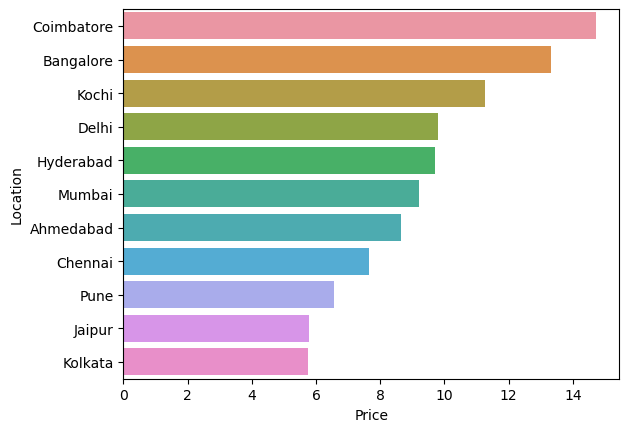

In [405]:
# Avg Used Car Price according to location
used_car_price=dff.groupby('Location')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=used_car_price,y=used_car_price.index)

<Axes: xlabel='Price', ylabel='Transmission'>

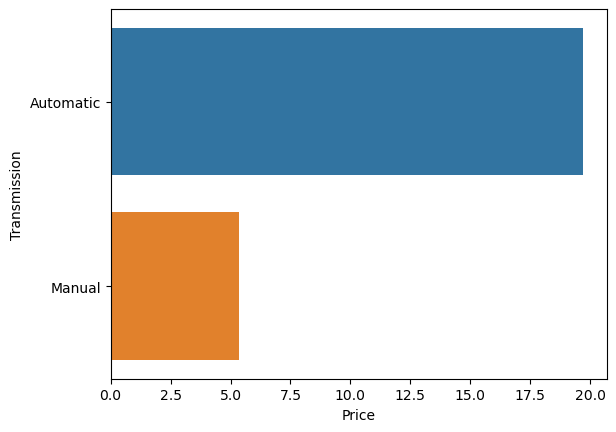

In [406]:
# # Avg Used Car Price according to Transmission
car_price_transmission=dff.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=car_price_transmission,y=car_price_transmission.index)

<Axes: xlabel='New_Price', ylabel='Transmission'>

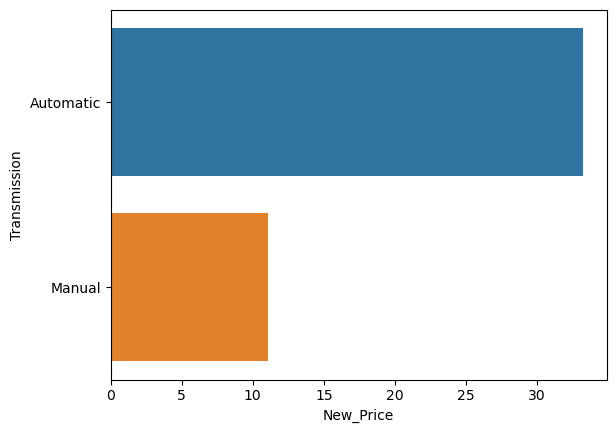

In [407]:
# # Avg New Car Price according to Transmission
new_price_transmission=dff.groupby('Transmission')['New_Price'].mean().sort_values(ascending=False)
sns.barplot(x=new_price_transmission,y=new_price_transmission.index)

<Axes: xlabel='Price', ylabel='Fuel_Type'>

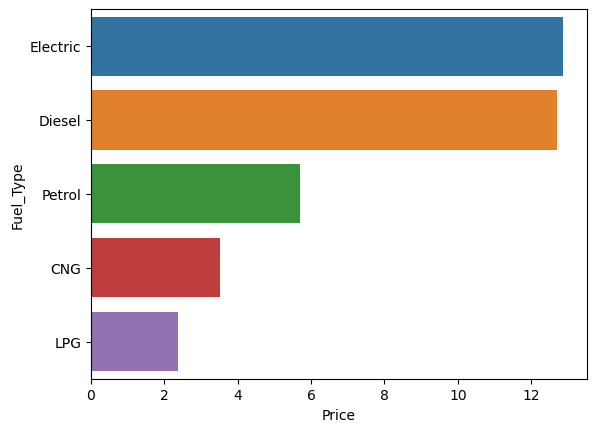

In [408]:
# Avg Used Car Price according to fuel type

fuel_type=dff.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=fuel_type,y=fuel_type.index)

<Axes: xlabel='New_Price', ylabel='Fuel_Type'>

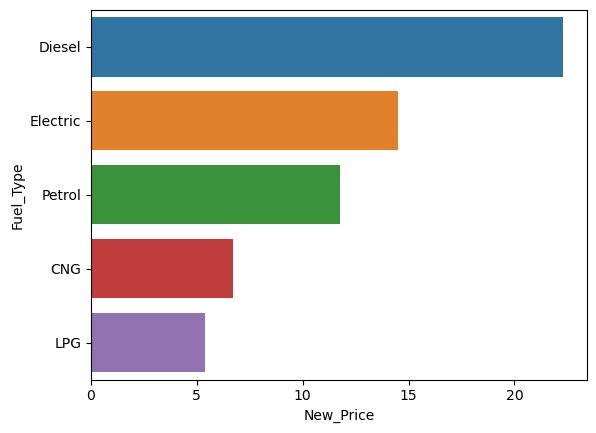

In [409]:
# Avg Used Car Price according to fuel type

fuel_type_new=dff.groupby('Fuel_Type')['New_Price'].mean().sort_values(ascending=False)
sns.barplot(x=fuel_type_new,y=fuel_type_new.index)

<Axes: xlabel='Price', ylabel='Owner_Type'>

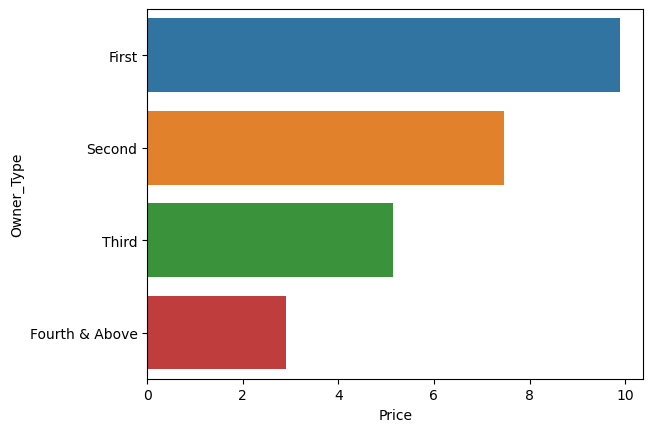

In [410]:
# Price According to Owner Type

owner=dff.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=owner,y=owner.index)

In [411]:
# Price with respect to the Year

year=dff.groupby('Year')['Price'].mean().sort_values(ascending=False)
year

Year
2019    18.523469
2018    15.470301
2017    13.460231
2016    11.696899
2015    11.195249
2014     9.721438
2013     8.578340
2012     7.342128
2011     6.697209
2009     5.214863
2010     5.212825
2008     4.124641
2006     3.209282
2007     3.121480
1996     2.617333
2003     2.594450
2005     2.120337
2004     1.836971
2001     1.543750
1998     1.432500
2002     1.388117
2000     1.081853
1999     0.835000
Name: Price, dtype: float64

Text(0.5, 0, 'No. of Seats')

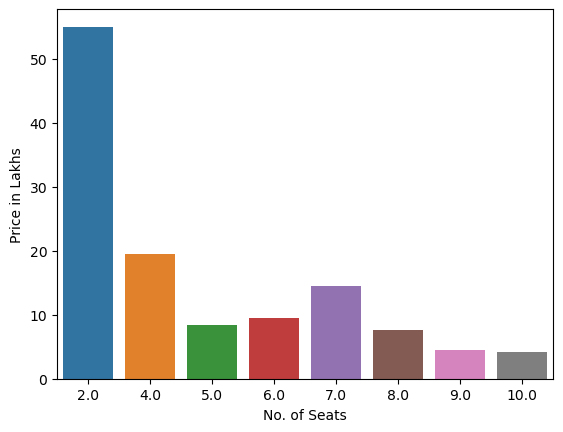

In [412]:
# Price with respect to seats in the car

seats=dff.groupby('Seats')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=seats.index,y=seats)
plt.ylabel('Price in Lakhs')
plt.xlabel('No. of Seats')

<Axes: xlabel='Power', ylabel='Price'>

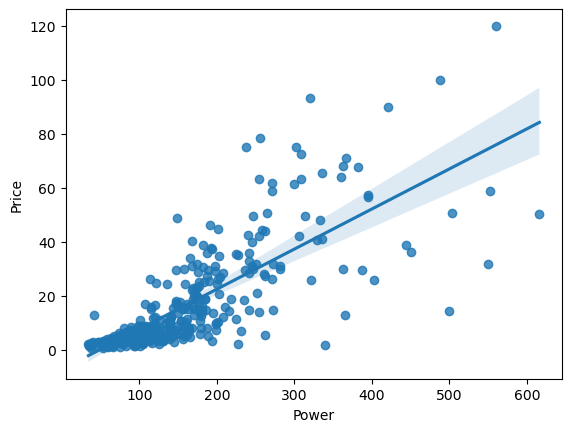

In [426]:
# Price According to Power
power=dff.groupby('Power')['Price'].mean().sort_values(ascending=False)
sns.regplot(x=power.index,y=power)

<Axes: xlabel='Power', ylabel='Price'>

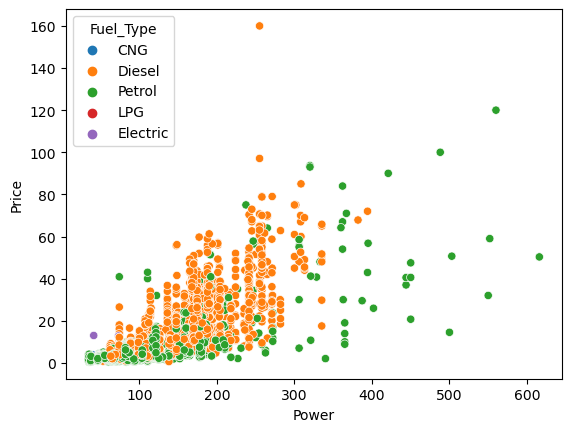

In [430]:
# Price According to Power
sns.scatterplot(x=dff.Power,y=dff.Price,hue=dff.Fuel_Type)